In [1]:
!pip3 install mathjax

  Preparing metadata (setup.py) ... done
  Created wheel for mathjax: filename=mathjax-0.1.2-py3-none-any.whl size=1918 sha256=99c8caeb523be086db740c9fbab231cc04253680db2424d4e56d4d096df93621
  Stored in directory: /Users/pamelagangopadhyay/Library/Caches/pip/wheels/56/ef/b8/40975c16c655b925f1ddb34971043fe42edc90dc0cd94586a7
Successfully built mathjax


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D

# Linear Algebraic Operations using Numpy

## Singular Value Decomposition

There is a famous saying that "The SVD is the Swiss Army Knife of Matrix Decomposition". We know that a square matrix
$\large{A_{n \times n}}$ is diagonalizable and we can define Eigenvalues and Eigenvectors for rectangular matrices. It is impossible to obtain Eigenvalues and Eigenvectors for rectangular matrices. Even for square matrices, Eigenvalues and Eigenvectors may have some issues.

- Singular Value Decomposition method enables orthogonal Diagonalization for matrices that can not be diagonalized, specially rectangular matrices and for non-diagonalizable matrices

- Singular Value Decomposition gives a kind of pseudo-inverse for rectangular matrices and for singular matrices.

- SVD is used in many applications e.g. Dimensionality Reduction (reduces the number of data dimensions to be able to work well with Machine Learning and Deep Learning models.

- SVD Gives the best low rank approximation of a given matrix.

### SVD the Bigger Picture

                                The           Orthogonal         Singular     Orthogonal Basis
                                Matrix A      Basis of Coulmn    Values of    for row space of A
                                              Space of A            A


$$ \Huge{\begin{bmatrix} A \end{bmatrix} \  = \ \begin{bmatrix} U \end{bmatrix} \ \begin{bmatrix} \sum \end{bmatrix} \ \begin{bmatrix} V^{T} \end{bmatrix}}$$

                                 mxn                  mxm           mxn           nxn
                                 
                                 
### Steps for Computing SVD 

Finding SVD of a Rectangular matrtix $$ \begin{bmatrix} 1  & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} $$

Finding the Eigenvalues and Eigenvectors of $ A^{T}A $

$$ A^{T}A = \begin{bmatrix} 1 & 0 \\ 1 & 1 \\ 0 & 1 \end{bmatrix} \ \ \begin{bmatrix} 1  & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} $$

$ \text{ Eigenvalues } \lambda = 0 \ \  \lambda = 3  \ \  \lambda = 1 $

$ \text{ Finding Eigenvectors for Eigenvalues } $

$ \text{ Eigenvectors for } \lambda = 3 \text{ is } \ \begin{bmatrix} 1 \\ 2 \\ 1  \end{bmatrix} $

$$  v_3 = \text{Span}{<1, 2, 1>^{T}} $$

$ \text{ Eigenvectors for } \lambda = 1 \text{ is } \ \begin{bmatrix} 1 \\ -1 \\ 1  \end{bmatrix} $

$$  v_3 = \text{Span}{<1, -1, 1>^{T}} $$

$ \text{ Calculating Singular Values } $

$ \text{The Singular Values of} \ \ \lambda = 3,  \ \  \lambda = 1, \ \ \lambda = 0 $

$ \sigma_0 = \sqrt{3} \ \sigma_1 = \sqrt{1} \ \sigma_2 = 0 $


$$ \sum = \begin{bmatrix} \sqrt{3} & 0 & 0 \\ 0 & \sqrt{1} & 0 \end{bmatrix} = \begin{bmatrix} \sqrt{3} & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}$$

$$ \text{ Constructing V } = \begin{bmatrix} 1 & -1 & 1 \\ 2 & 0 & -1 \\ 1 & 1 & 1 \end{bmatrix} $$

$$ \text{ Normalized V } = \begin{bmatrix} \frac{1}{\sqrt{6}} & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \\ 
\frac{2}{\sqrt{6}} & 0 & -\frac{1}{\sqrt{3}}
\\ \frac{1}{\sqrt{6}}  & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}} \end{bmatrix} $$


$ \text{Constructing U} $

$$ u_1 = \frac{1}{\sqrt{3}} \begin{bmatrix} 1 & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} 
\begin{bmatrix} \frac{1}{\sqrt{6}} \\ \frac{2}{\sqrt{6}} \\ \frac{1}{\sqrt{6}}\end{bmatrix} $$

$$ U = \begin{bmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{bmatrix} $$


$$ V^T = \begin{bmatrix} 
\frac{1}{\sqrt{6}} & \frac{2}{\sqrt{6}} & -\frac{1}{\sqrt{6}} \\ 
-\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}}
\end{bmatrix} $$ 


$$ U \sum V^T = \begin{bmatrix} \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}}\end{bmatrix}
\begin{bmatrix} \sqrt{3} & 0 & 0 \\ 0 & \sqrt{1} & 0 \end{bmatrix} = \begin{bmatrix} \sqrt{3} & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}
\begin{bmatrix} 
\frac{1}{\sqrt{6}} & \frac{2}{\sqrt{6}} & -\frac{1}{\sqrt{6}} \\ 
-\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{3}} \\
\frac{1}{\sqrt{6}} & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{3}}
\end{bmatrix} 
$$

$$ = \begin{bmatrix} 1  & 1 & 0 \\ 0 & 1 & 1 \end{bmatrix} = A $$


In [22]:
# the matrix
A = [ [1,1,0], [0,1,1] ]

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)

print("Printing U")
print(U)
print()
print(f"Printing the Singular values in descending order {S}"), print(' ')
print("Printing V")
print(V)


Printing U
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Printing the Singular values in descending order [1.73205081 1.        ]
 
Printing V
[[-4.08248290e-01 -8.16496581e-01 -4.08248290e-01]
 [-7.07106781e-01  2.13278616e-16  7.07106781e-01]
 [ 5.77350269e-01 -5.77350269e-01  5.77350269e-01]]


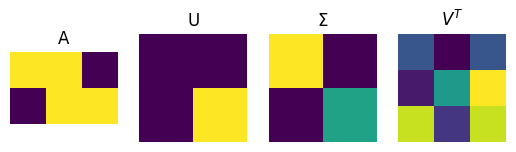

In [23]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

In [19]:
# the matrix
A = [ [2,0,7], [5,1,3] ]

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)

print("Printing U")
print(U)
print()
print(f"Printing the Singular values in descending order {S}"), print(' ')
print("Printing V")
print(V)

Printing U
[[-0.7996281  -0.60049555]
 [-0.60049555  0.7996281 ]]

Printing the Singular values in descending order [8.73384364 3.42344493]
 
Printing V
[[-0.52688531 -0.06875501 -0.84715088]
 [ 0.81705693  0.23357411 -0.52712533]
 [-0.23411502  0.96990509  0.06689001]]


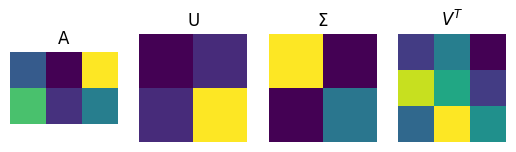

In [7]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()